# Mathematics Problem Set 6


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
cmap1 = matplotlib.cm.get_cmap('summer')
%matplotlib notebook



### Exercise 8.1

<IPython.core.display.Javascript object>


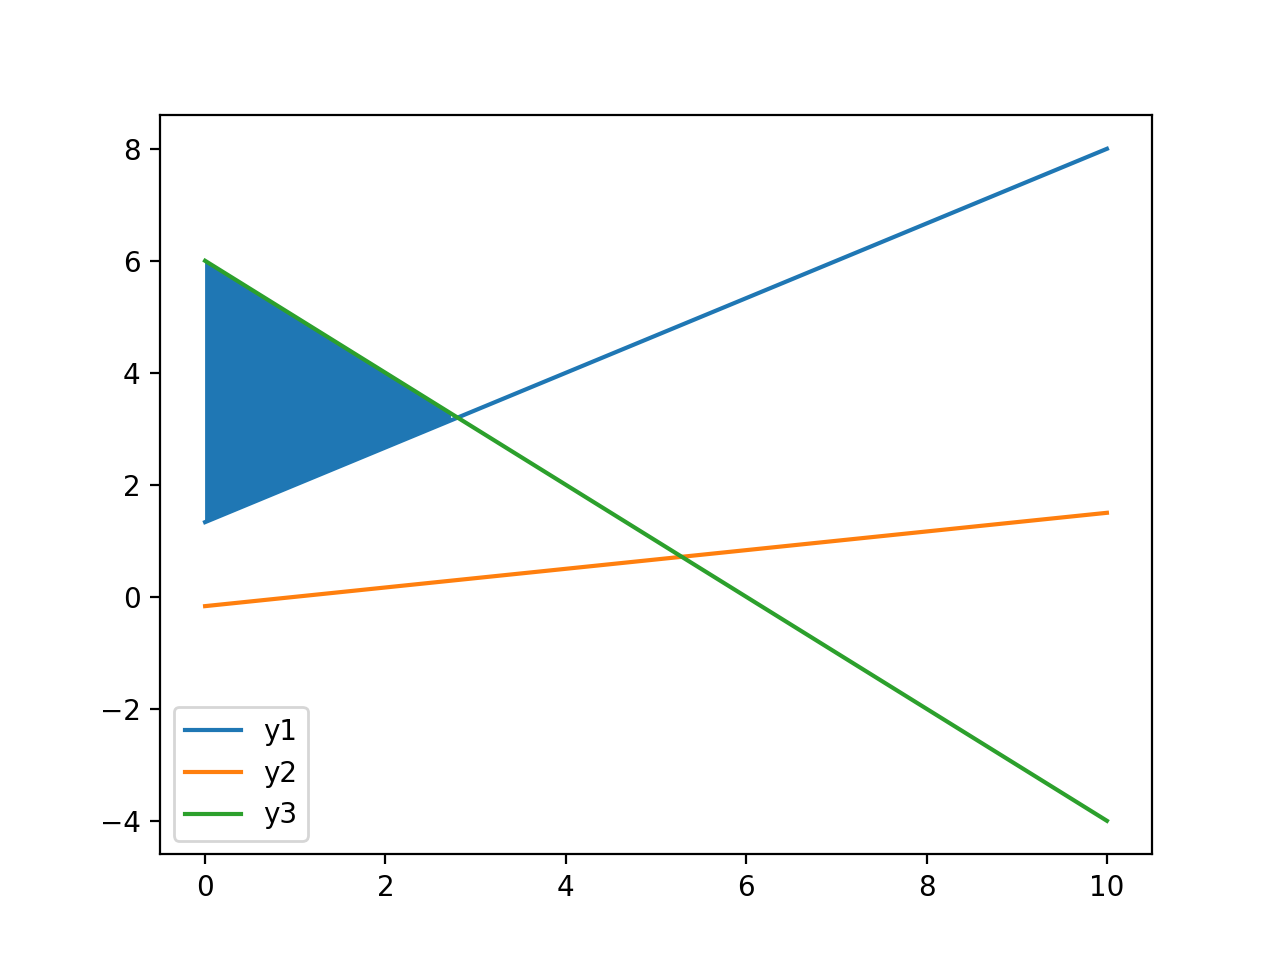

In [18]:


x = np.linspace(0,10,100)

y1 = (2*x + 4)/3 
y2 = (x - 1)/6 
y3 = 6 - x

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend()
plt.show()


In [19]:


plt.fill_between(x, y3, np.maximum(y1, y2), where= y3>=np.maximum(y1, y2))

### Exercise 8.2

### (i)

<IPython.core.display.Javascript object>


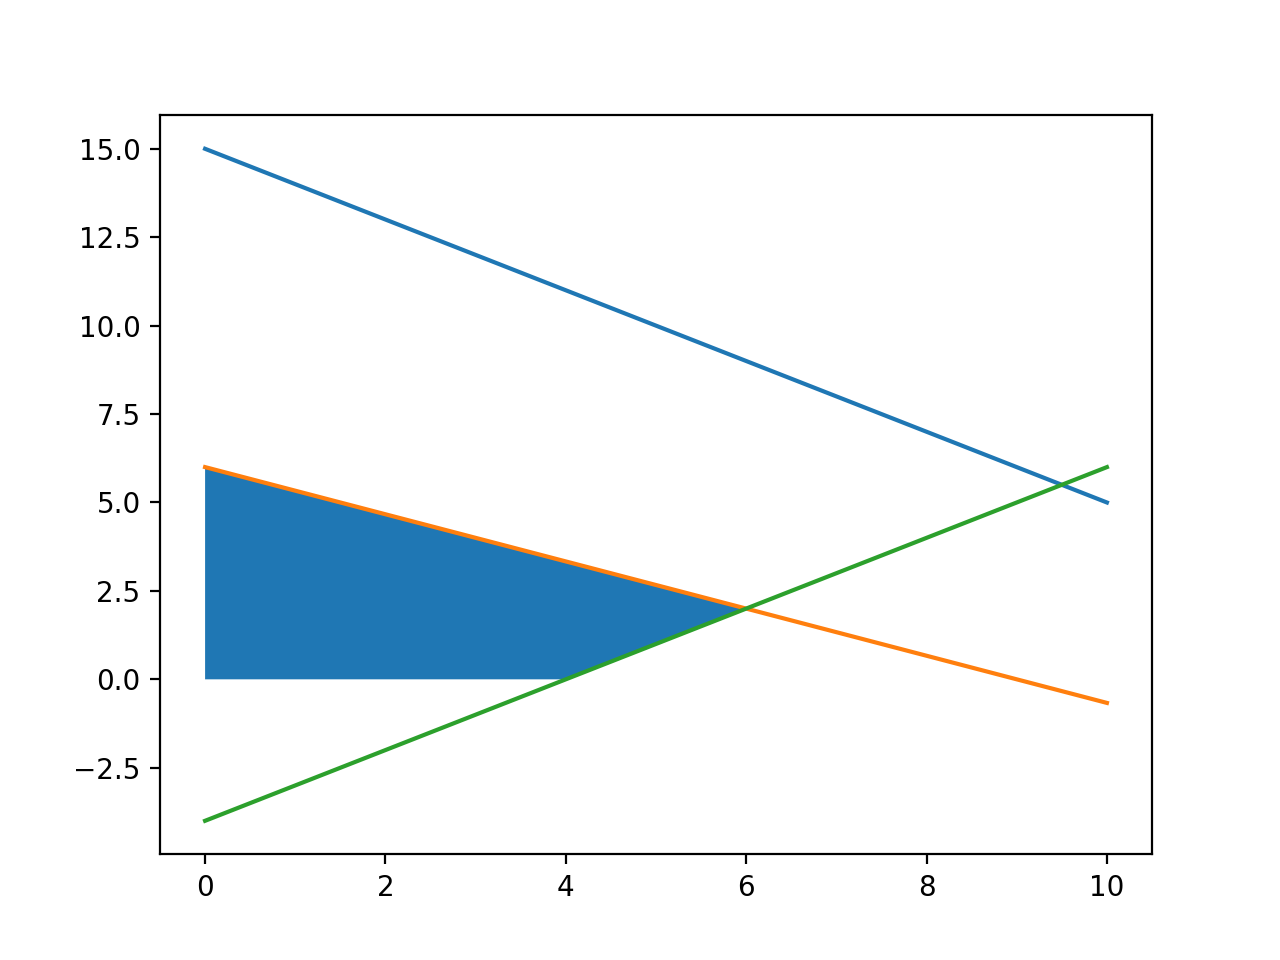

In [28]:

# Plot Feasible Set
x = np.linspace(0,10,100)
y1 = 15 - x 
y2 = (18 - 2*x)/3 
y3 = x - 4

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend()
plt.show()

In [29]:
yubd = np.minimum(y1, y2)
ylbd = np.maximum(y3, 0)
plt.fill_between(x, yubd, ylbd, where= yubd>=ylbd)

### (ii)

<IPython.core.display.Javascript object>


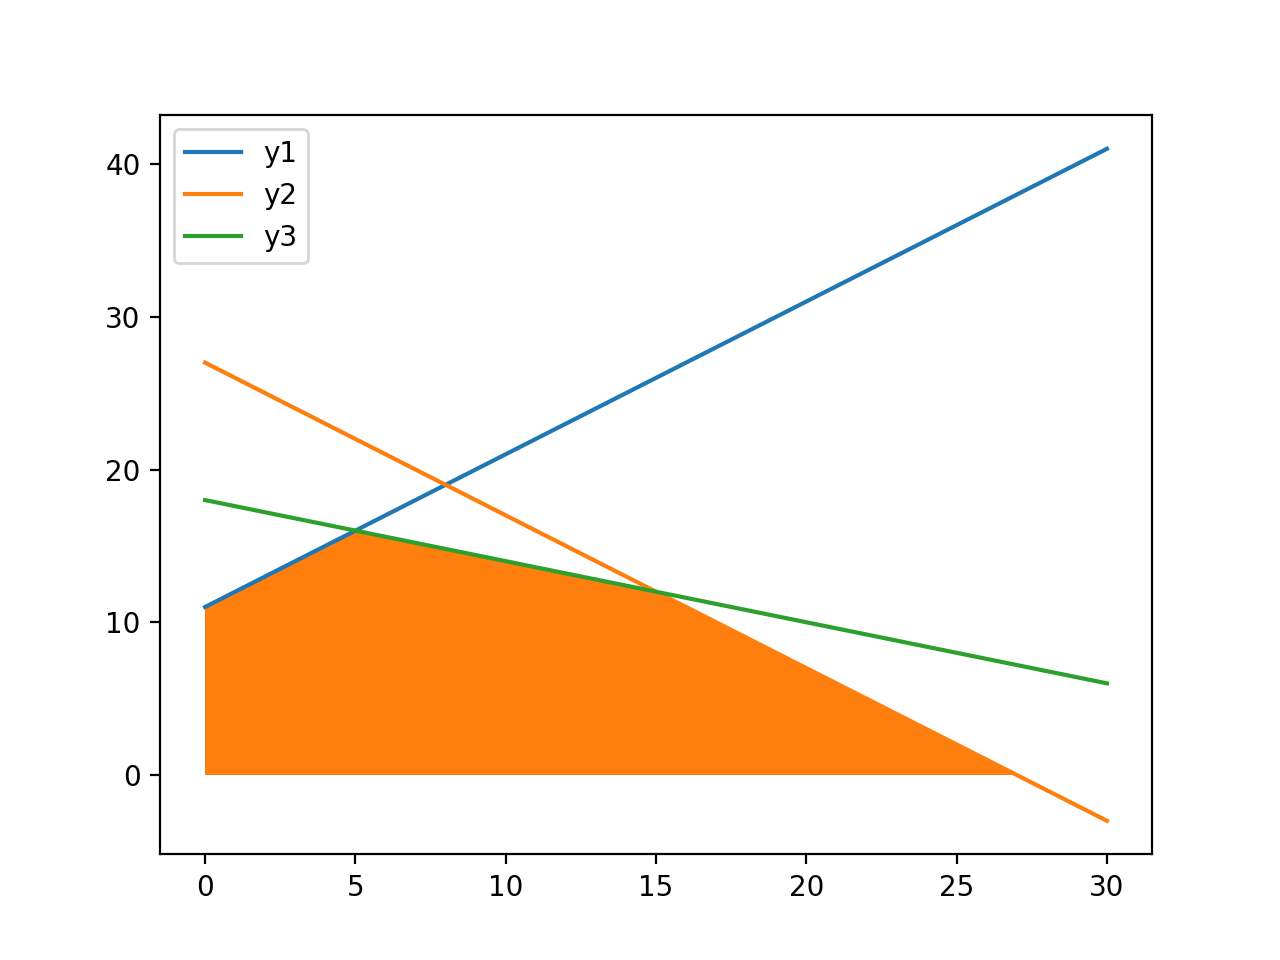

In [66]:

x = np.linspace(0,30,300)
y1 = 11 + x
y2 = 27 - x
y3 = (90 - 2*x)/5

plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend()
plt.show()

In [68]:
yubd = np.amin(np.array([y1,y2,y3]), axis = 0)
ylbd = 0
plt.fill_between(x, yubd, ylbd, where= yubd>=ylbd)


### Exercise 8.5

In [94]:
class SimplexOpt(object):
    
    def __init__(self, c, A, b):
        n_c = c.shape[0]
        m_A, n_A = A.shape
        m_b = b.shape[0]
        
        self.m = m_A
        self.n = n_A
        # Problem 1
        simplexBool = True
        for i in range(m_b):
            if b[i] < 0:
                #simplexBool = False
                break

        if simplexBool == False:
            raise ValueError("Problem not feasible at the origin.")
        self.A = A
        self.b = np.array(b)
        self.c = np.array(c)
        
        # Problem 2
        varstore = np.zeros((self.n + self.m))
        varstore[:self.m] = b
        self.varstore = varstore
        
        L = np.zeros((self.n + self.m))
        L[:self.m] = np.arange(self.n, self.n+self.m, 1) 
        L[self.m:] = np.arange(0, self.n, 1)
        self.L = L
        
    # Problem 3
    def get_tableau(self):
        m = self.m
        n = self.n
        A = self.A
        b = self.b 
        c = self.c 
        r1 = np.hstack((np.array([0]),-c,np.zeros(m),np.array([1])))
        r2 = np.hstack((b.reshape(m,1),A,np.eye(m),np.zeros((m,1))))
        
        tableau = np.vstack((r1,r2))
        self.tableau = tableau
        return tableau
    
    # Problem 4
    def findPivot(self, tableau):
        
        complete = True
        for i in range(1, tableau.shape[1]):
            
            colentry = tableau[0,i]
            if colentry < 0:
                col = i
                complete = False
                break
            else:
                pass
        
        
        if complete == True: 
            return 'complete', 'complete'
        self.col = col
        #print('The column chosen is '+ str(col) + ' since the entry is ' + str(tableau[0,col]))
        
        ctableau = np.copy(tableau)
        for i in range(1, ctableau.shape[0]):
            if ctableau[i, col] <= 0:
                ctableau[i, col] = 0.
        
        ctableau[ctableau<=0] = -1
        '''ratios = np.empty_like(tableau[1:,0]) 
        print(ratios)
        for i in range(len(ratios)):'''
        ratios = tableau[1:,0]/ctableau[1:, col]
        ratios[ratios<=0] = np.inf
        row = np.argmin(ratios) + 1
        self.row = row
        
        #print('The row chosen is '+ str(row) + ' since the ratio is ' + str(ratios[row - 1]))
        #print('The ratio is given by '+ str(tableau[row,0]) + ' divided by ' + str(ctableau[row ,col]))
        return self.row, self.col
    
    # Problem 5
    def checkBoundedness(self, tableau):
        row, col = self.findPivot(tableau)
        for i in range(1, tableau.shape[0]):
            if tableau[i,col] > 0:
                bounded = True
                break
            else: 
                bounded = False
        if bounded == False:
            raise ValueError('Problem unbounded!')
        else:
            print('The problem is well-posed.')
        
    # Problem 6
    def pivot(self):
        
        tableau = np.copy(self.tableau)
        row, col = self.findPivot(self.tableau)
        nbpivot = row - 1
        bpivot = np.where(self.L == col - 1)
        self.L[nbpivot], self.L[bpivot] = self.L[bpivot], self.L[nbpivot]
        
        tableau[row,:] = tableau[row,:]/tableau[row,col]
        
        for i in range(tableau.shape[0]):
            if i == row:
                pass
            else:
                tableau[i,:] -= tableau[i,col] * tableau[row,:]
                
        self.tableau = tableau
        self.col = col
        return self.tableau, self.L, self.col
        
    # Problem 7    
    def solve(self):
        tableau = self.get_tableau()
        m, n = tableau.shape
        col = 0
        it = 0

        while col != 'complete' : 
            tableau, L, col = self.pivot()
            
            self.tableau, self.L = tableau, L
            objmax = tableau[0,0]
            m,n = self.A.shape
            bs = dict(zip(L[:m],tableau[1:,0]))
            nbs = dict(zip(L[m:],np.zeros(n).astype(str)))
            print(objmax, bs, nbs)
            row, col = self.findPivot(self.tableau)
            if row == 'complete':
                break
        
    
        
        L = self.L.astype(int)
        tableau = np.round(tableau,4)
        objmax = tableau[0,0]
        m,n = self.A.shape
        bs = dict(zip(L[:m],tableau[1:,0]))
        nbs = dict(zip(L[m:],np.zeros(n).astype(str)))
        return (objmax, bs, nbs)

### (i)

In [95]:
c = np.array([3, 1])
b = np.array([15,18,4])
A = np.array([[1,3], [2, 3], [1, -1]])
LP1 = SimplexOpt(c,A,b)
sol = LP1.solve()
sol

12.0 {2.0: 11.0, 3.0: 10.0, 0.0: 4.0} {4.0: '0.0', 1.0: '0.0'}
20.0 {2.0: 3.0, 1.0: 2.0, 0.0: 6.0} {4.0: '0.0', 3.0: '0.0'}


(20.0, {0: 6.0, 1: 2.0, 2: 3.0}, {3: '0.0', 4: '0.0'})

### (ii)

In [96]:
c = np.array([4,6])
b = np.array([11,27,90])
A = np.array([[-1,1], [1,1], [2,5]])
LP2 = SimplexOpt(c,A,b)
sol = LP2.solve()
sol

108.0 {2.0: 38.0, 0.0: 27.0, 4.0: 36.0} {3.0: '0.0', 1.0: '0.0'}
132.0 {2.0: 14.0, 0.0: 15.0, 1.0: 12.0} {3.0: '0.0', 4.0: '0.0'}


(132.0, {0: 15.0, 1: 12.0, 2: 14.0}, {3: '0.0', 4: '0.0'})

### Exercise 8.7

### (i)

In [97]:
c = np.array([1,2])
b = np.array([-8,6,3])
A = np.array([[-4,-2], [-2,3], [1,0]])
LP1 = SimplexOpt(c,A,b)
sol = LP1.solve()
sol

3.0 {2.0: 4.0, 3.0: 12.0, 0.0: 3.0} {4.0: '0.0', 1.0: '0.0'}
11.0 {2.0: 12.0, 1.0: 4.0, 0.0: 3.0} {4.0: '0.0', 3.0: '0.0'}


(11.0, {0: 3.0, 1: 4.0, 2: 12.0}, {3: '0.0', 4: '0.0'})

### (ii) TOOOOODDDDDOOOOO: INFEASIBILITY

In [98]:
c = np.array([5,2])
b = np.array([15,15,-12])
A = np.array([[5,3], [3,5],[4,-3]])
LP2 = SimplexOpt(c,A,b)
sol = LP2.solve()
sol

15.0 {0.0: 3.0, 3.0: 6.0, 4.0: -24.0} {2.0: '0.0', 1.0: '0.0'}


(15.0, {0: 3.0, 3: 6.0, 4: -24.0}, {1: '0.0', 2: '0.0'})

### (iii)

In [89]:
c = np.array([-3,1])
b = np.array([4,6])
A = np.array([[0,1], [-2,3]])
LP3 = SimplexOpt(c,A,b)
sol = LP3.solve()
sol


2.0 {2.0: 2.0, 1.0: 2.0} {0.0: '0.0', 3.0: '0.0'}


(2.0, {1: 2.0, 2: 2.0}, {0: '0.0', 3: '0.0'})

### Exercise 8.13

### Exercise 8.17

### Exercise 8.18

### Exercise 9.3

### Exercise 9.6

### Exercise 9.7

### Exercise 9.10